# Abalone Case Study

## Problem Statement:

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

# Data Set Information:

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)

Length / continuous / mm / Longest shell measurement

Diameter / continuous / mm / perpendicular to length

Height / continuous / mm / with meat in shell

Whole weight / continuous / grams / whole abalone

Shucked weight / continuous / grams / weight of meat

Viscera weight / continuous / grams / gut weight (after bleeding)

Shell weight / continuous / grams / after being dried

Rings / integer / -- / +1.5 gives the age in years. 


You have to predict the rings of each abalone which will lead us to the age of that abalone. 



# Interest
Predicting the age of abalone from physical measurements:

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.



# Apply different regression techniques:

I am now interested in performing various regression techniques such as additive models, interactions, polynomial transformations of the variables etc to be able to predict and assess the accuracy of our prediction.
Beyond regression models:

Is there any other type of machine learning methodology which can predict the age more accurately than using regression model ?
Implementation in real application:

Understand whether the data set & the regression models are sufficient to predict the age of abalone accurately enough so that it can be used in real application.


In [228]:
# Importing main required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import randn
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.metrics import roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
plt.style.use('fivethirtyeight') # Good looking plots
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import logit, probit, poisson, ols
from sklearn import datasets




# Not to display warnings.

import warnings
warnings.filterwarnings('ignore')

In [229]:
# Read the given data set
data=pd.read_csv('/Users/rakeshchandramaity/Desktop/ml/Abalone_case.csv')

In [230]:
## Keeping our raw data safe in 'data' data frame. As we are now going to work with 'df'data frame.

df=data

In [231]:
# Head Checking
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [232]:
# Tail Checking
df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


Text(0.5, 1.0, 'Rings vs length and sex')

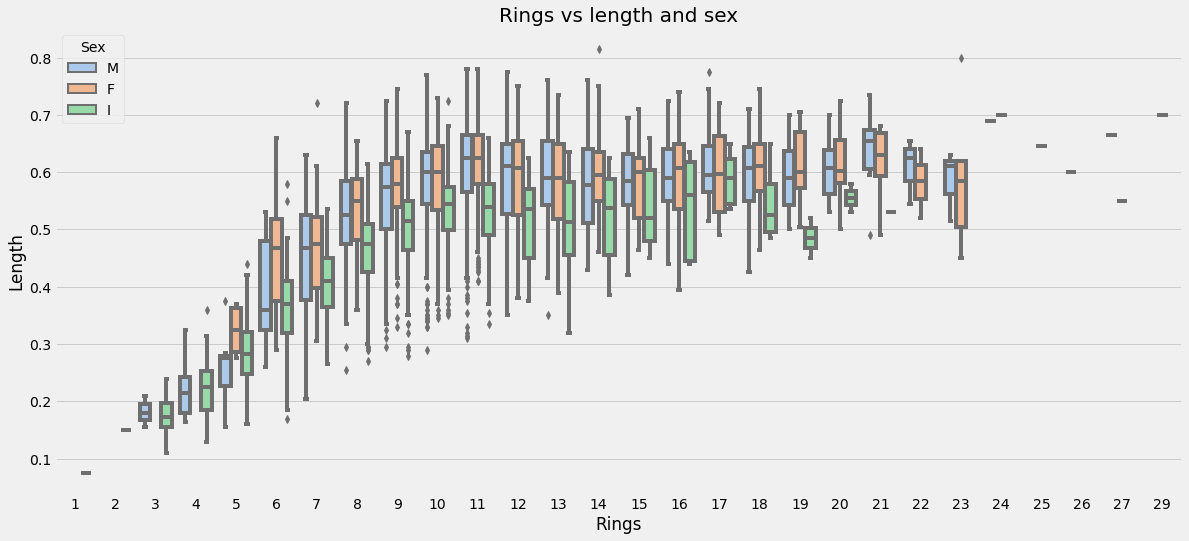

In [233]:
# plotting a hue plot

plt.rcParams['figure.figsize'] = (18, 8)
sns.boxplot(df['Rings'], df['Length'], hue = df['Sex'], palette = 'pastel')
plt.title('Rings vs length and sex', fontsize = 20)

##### From the above:-
    
Findings & Observations: Length & number of rings is generally higher im M&F w.r.t. Infant

In [234]:
# Understanding the row & column numbers
df.shape

(4177, 9)

In [235]:
# Sex is either Male ("M"), Female ("F") or Infant ("I"), this is not suitable for regression algorithms, 
#so I want to create a numeric mapping : 1:Male, 2: Female, 3:Infant

sex_dictionary = {'M': 1, 'F' : 2,'I':3}
df['Sex'] = df['Sex'].apply(lambda x: sex_dictionary[x])

In [236]:
# Checking the Sex Mapping in numerical value
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [237]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.955470,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,1.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,1.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,2.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,3.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,3.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


From the above description the data seems Okay as per problem context.

In [238]:
# Now wanted to check that all the Sex Data is equality distributed or not

df['Sex'].value_counts()

1    1528
3    1342
2    1307
Name: Sex, dtype: int64

In [239]:
df['Sex'].unique()

array([1, 2, 3])

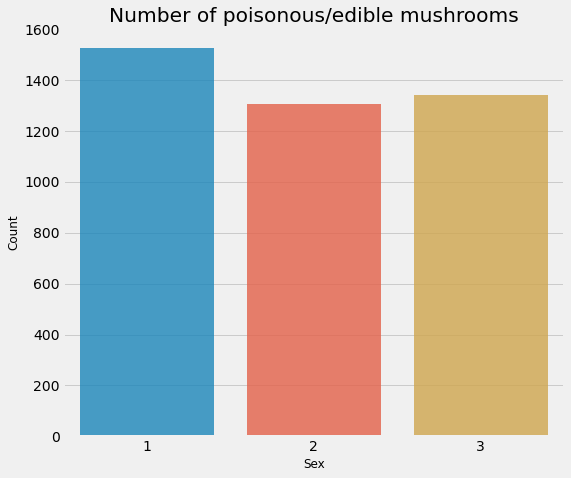

In [240]:
count = df['Sex'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index, count.values, alpha=0.8)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Sex', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')
#plt.savefig("mushrooms1.png", format='png', dpi=500)
plt.show()

#### ** Observations :: Looking at the dataset summary, we can see that 'sex' data is quite evenly distributed.


In [241]:
# So now checking all the data are in numeric form or Not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


In [242]:
# checking the columns of the data

df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [243]:
#Checking for missing/null values.


df.isnull().sum()  

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

From the the above we can conclude that no data 'NaN'data

### Need to Change the Data Type for futher processing.

In [244]:
#df = df.astype('category')
#df.dtypes

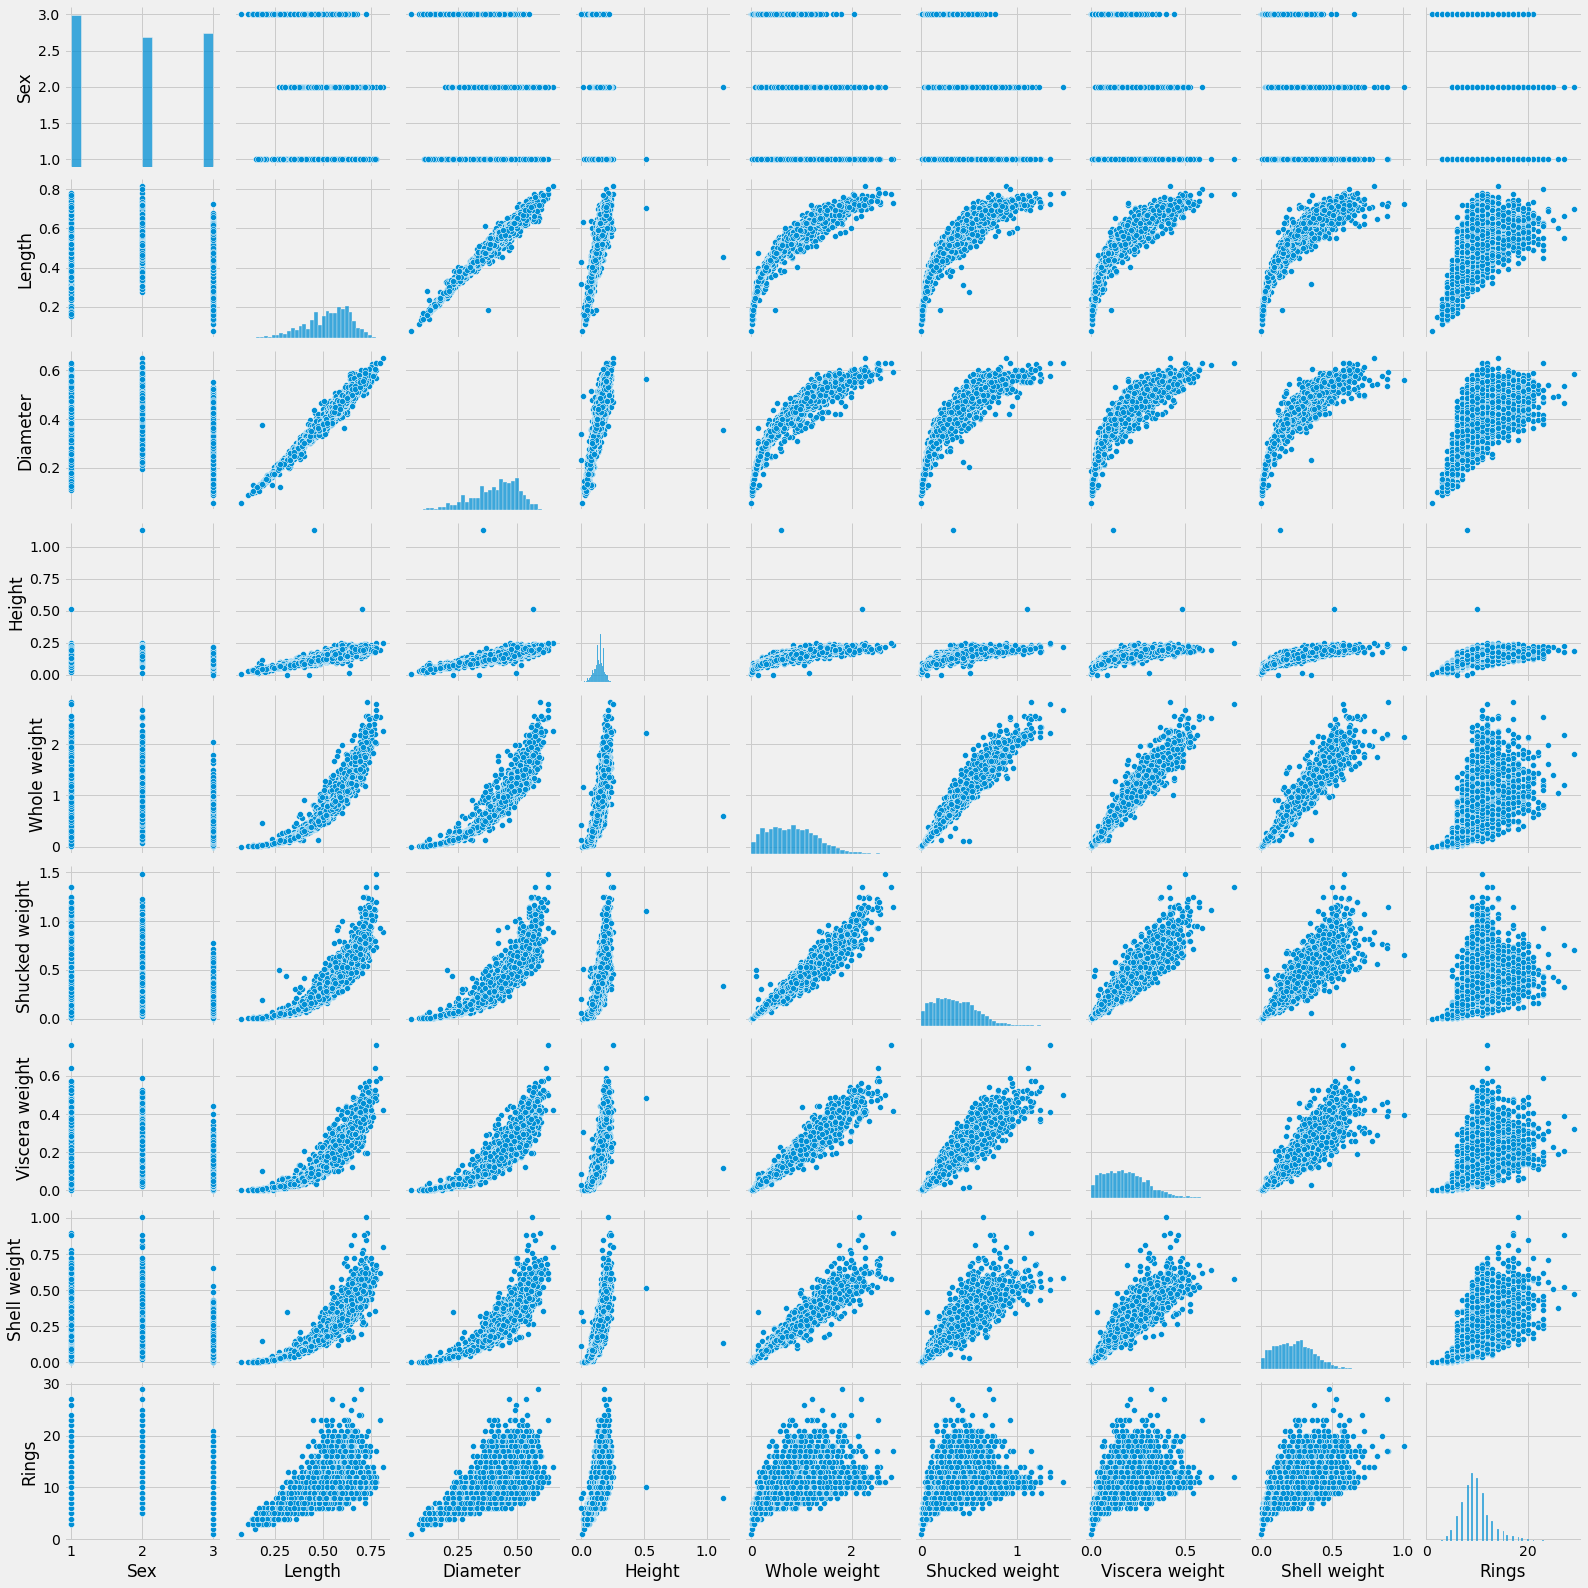

In [245]:
#pairplot
import seaborn as sns
sns.pairplot(df)

Text(0.5, 1.0, 'Rings vs weight')

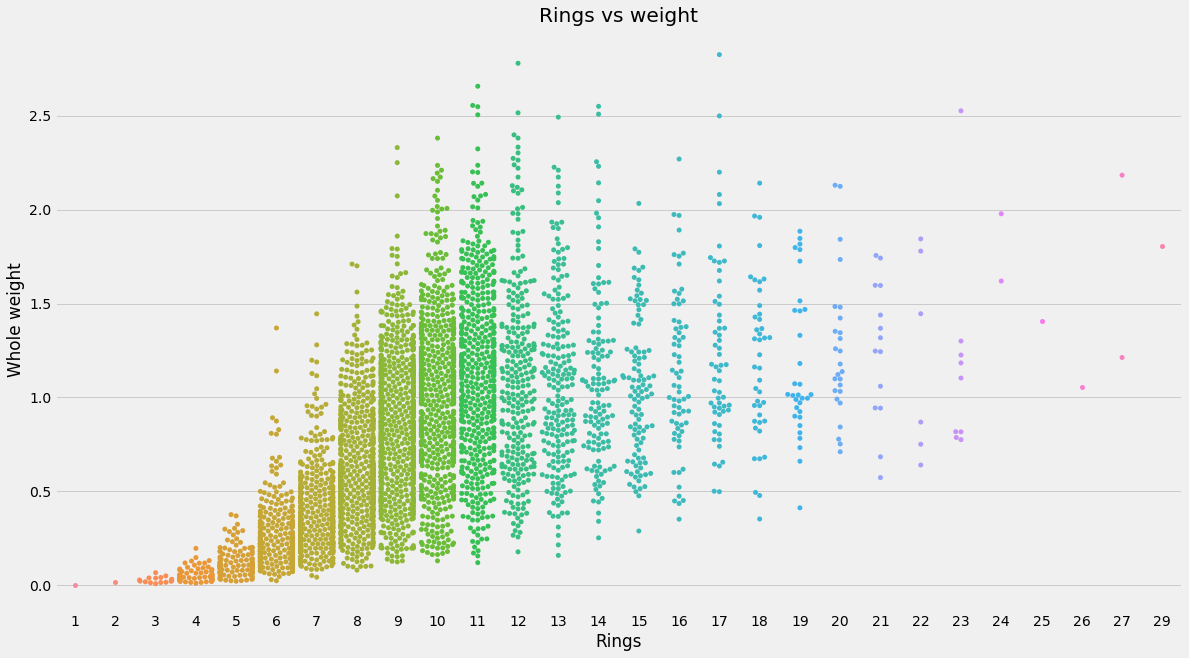

In [246]:
# ring vs weight

plt.rcParams['figure.figsize'] = (18, 10)
sns.swarmplot(df['Rings'], df['Whole weight'])
plt.title('Rings vs weight')

Text(0.5, 1.0, 'Rings vs Sex')

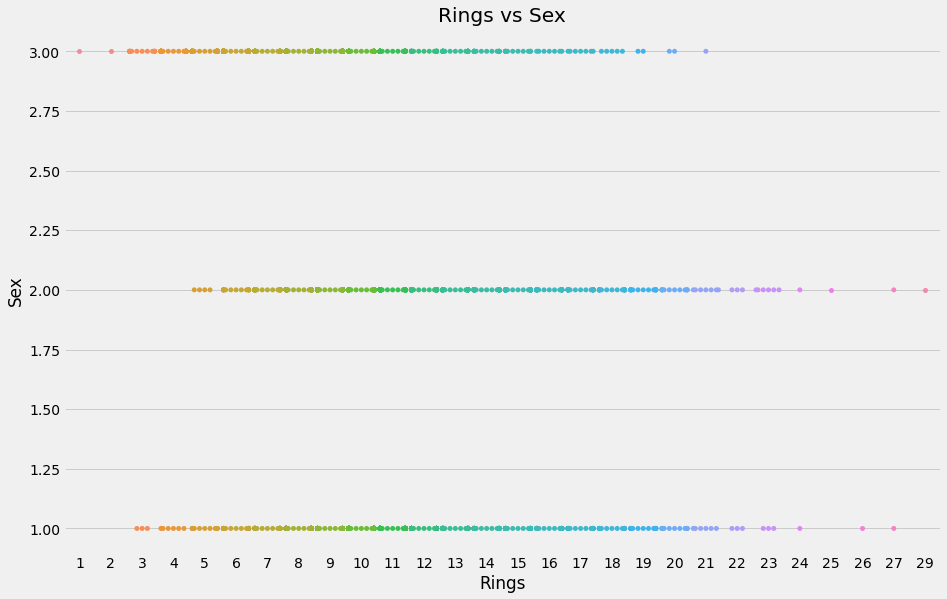

In [247]:
# ring vs sex

plt.rcParams['figure.figsize'] = (14, 9)
sns.swarmplot(df['Rings'], df['Sex'])
plt.title('Rings vs Sex')

Text(0.5, 1.0, 'Rings vs Length ')

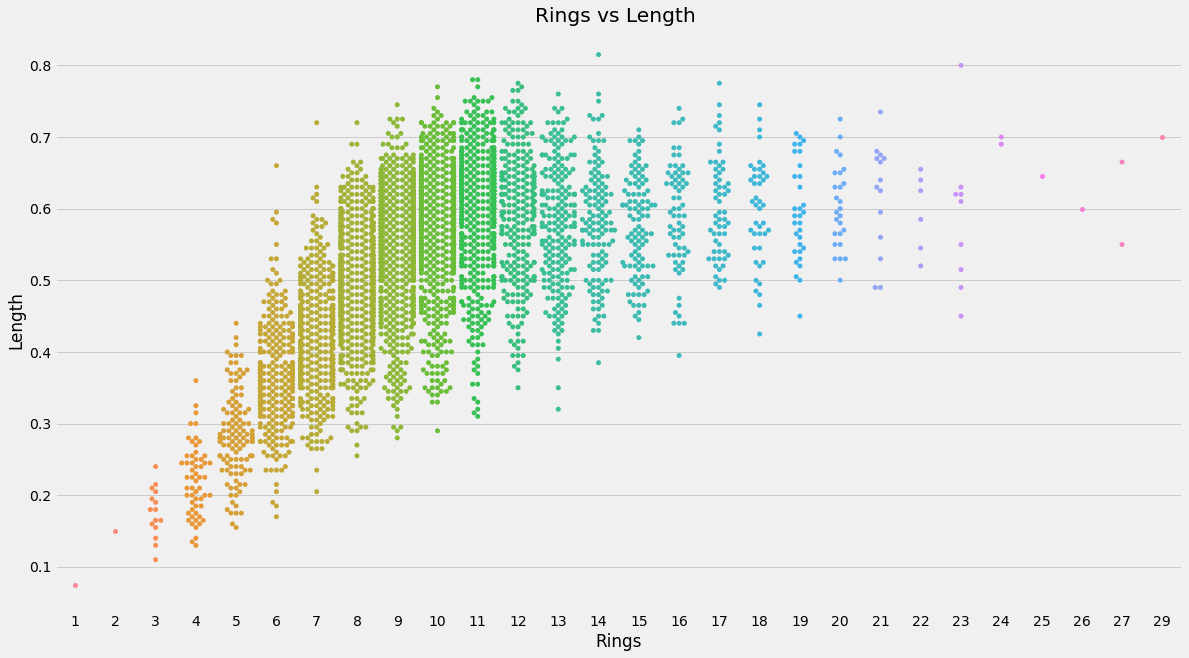

In [248]:
# ring vs Length 

plt.rcParams['figure.figsize'] = (18, 10)
sns.swarmplot(df['Rings'], df['Length'])
plt.title('Rings vs Length ')

Text(0.5, 1.0, 'Rings vs Diameter')

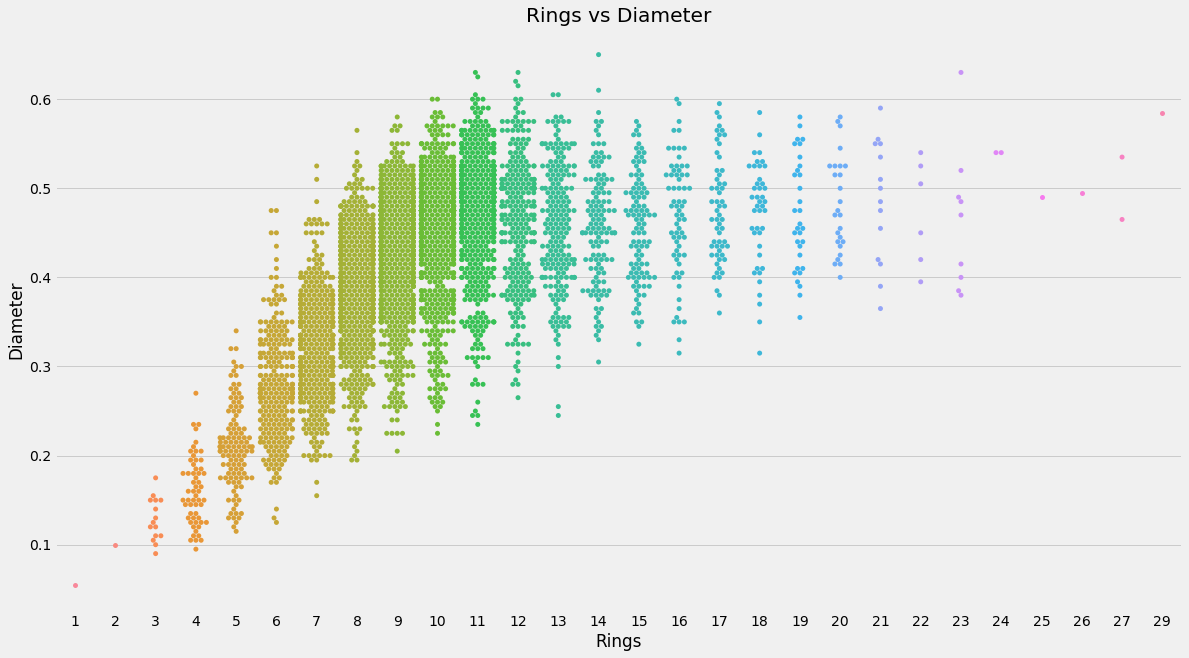

In [249]:
# ring vs weight

plt.rcParams['figure.figsize'] = (18, 10)
sns.swarmplot(df['Rings'], df['Diameter'])
plt.title('Rings vs Diameter')

Text(0.5, 1.0, 'Rings vs Height')

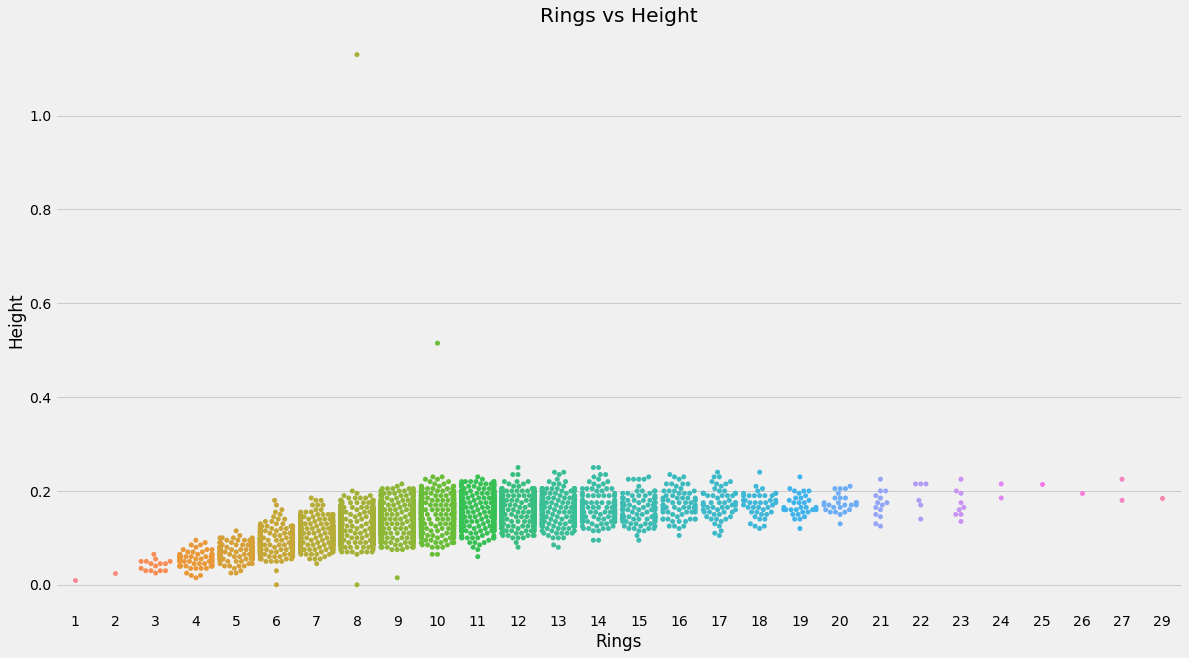

In [250]:
# ring vs Height

plt.rcParams['figure.figsize'] = (18, 10)
sns.swarmplot(df['Rings'], df['Height'])
plt.title('Rings vs Height')

Text(0.5, 1.0, 'Rings vs Shucked weight')

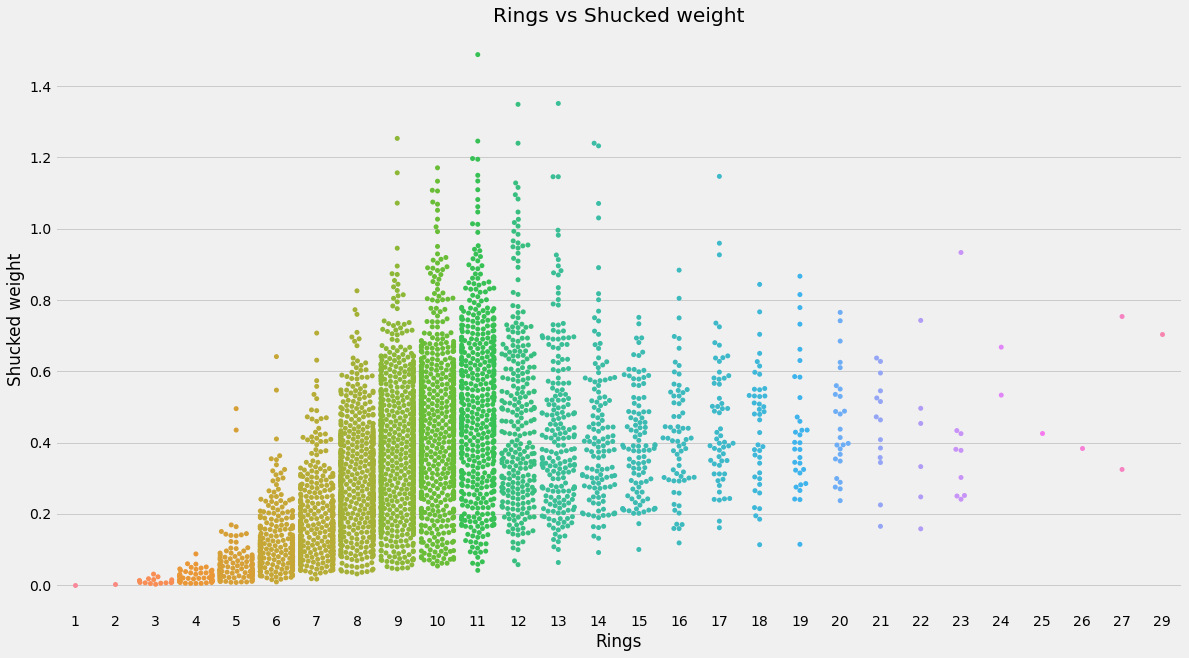

In [251]:
# ring vs Shucked weight

plt.rcParams['figure.figsize'] = (18, 10)
sns.swarmplot(df['Rings'], df['Shucked weight'])
plt.title('Rings vs Shucked weight')

Text(0.5, 1.0, 'Rings vs Viscera weight')

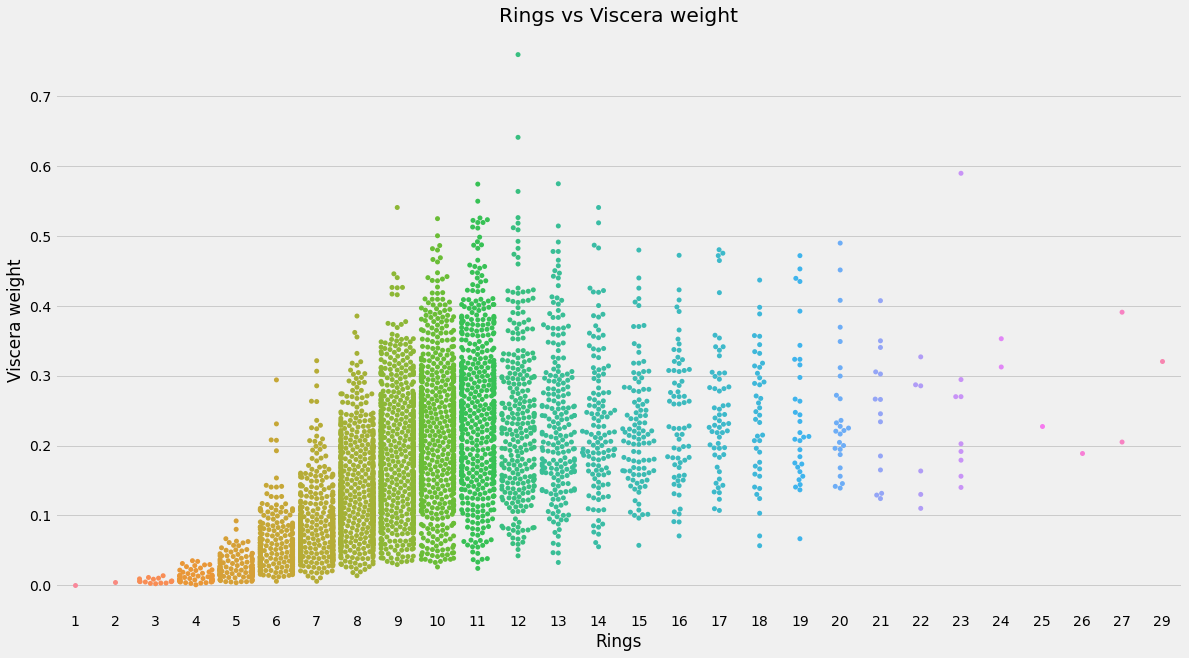

In [252]:
# ring vs Viscera weight

plt.rcParams['figure.figsize'] = (18, 10)
sns.swarmplot(df['Rings'], df['Viscera weight'])
plt.title('Rings vs Viscera weight')

Text(0.5, 1.0, 'Rings vs Shell weight')

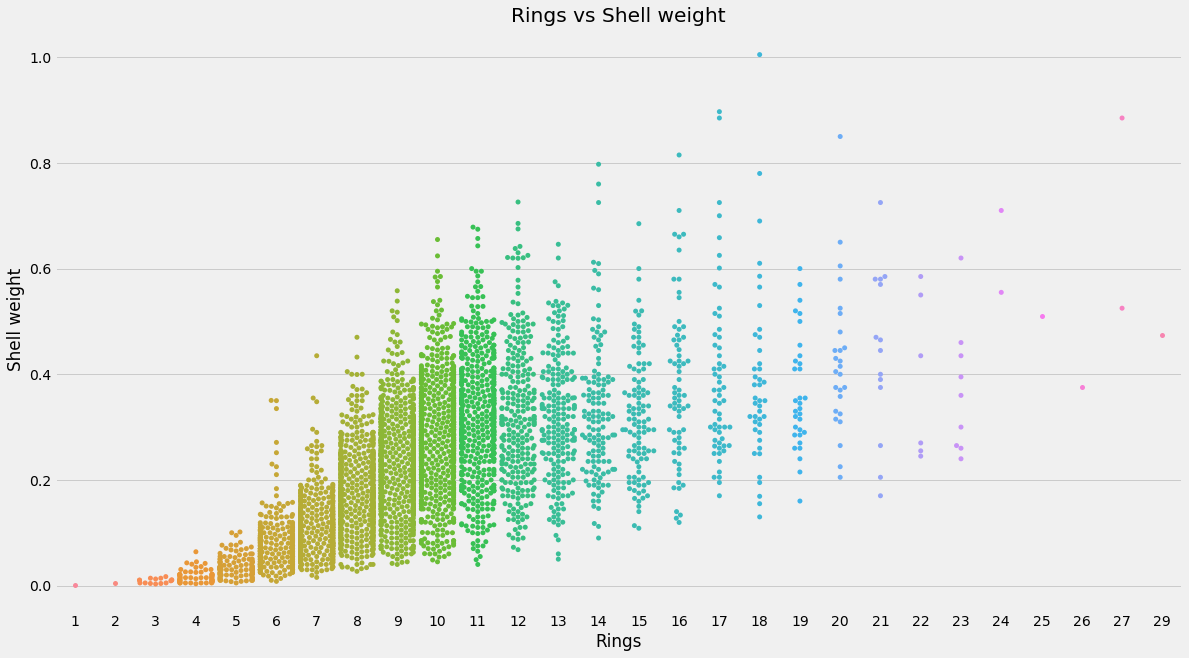

In [253]:
# ring vs Shell weight

plt.rcParams['figure.figsize'] = (18, 10)
sns.swarmplot(df['Rings'], df['Shell weight'])
plt.title('Rings vs Shell weight')

Text(0.5, 1.0, 'Rings vs diameter and sex')

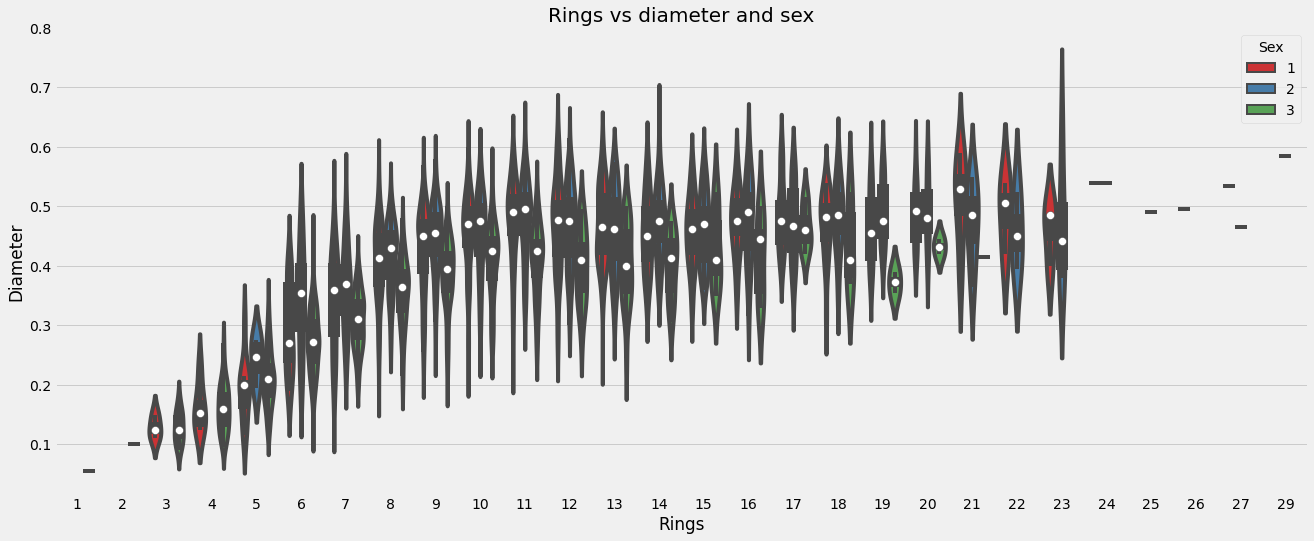

In [254]:
# rings vs diameter and sex

plt.rcParams['figure.figsize'] = (20, 8)
sns.violinplot(df['Rings'], df['Diameter'], hue = df['Sex'], palette = 'Set1')
plt.title('Rings vs diameter and sex', fontsize = 20)

Text(0.5, 1.0, 'Rings vs height and sex')

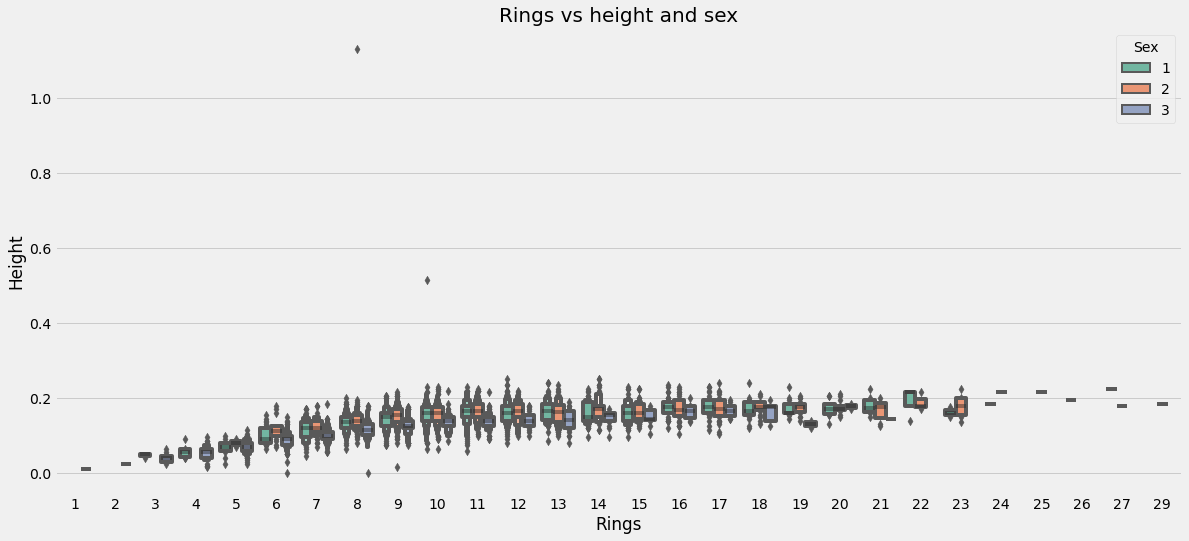

In [255]:
# rings vs height and sex

plt.rcParams['figure.figsize'] = (18, 8)
sns.boxenplot(df['Rings'], df['Height'], hue = df['Sex'], palette = 'Set2')
plt.title('Rings vs height and sex', fontsize = 20)

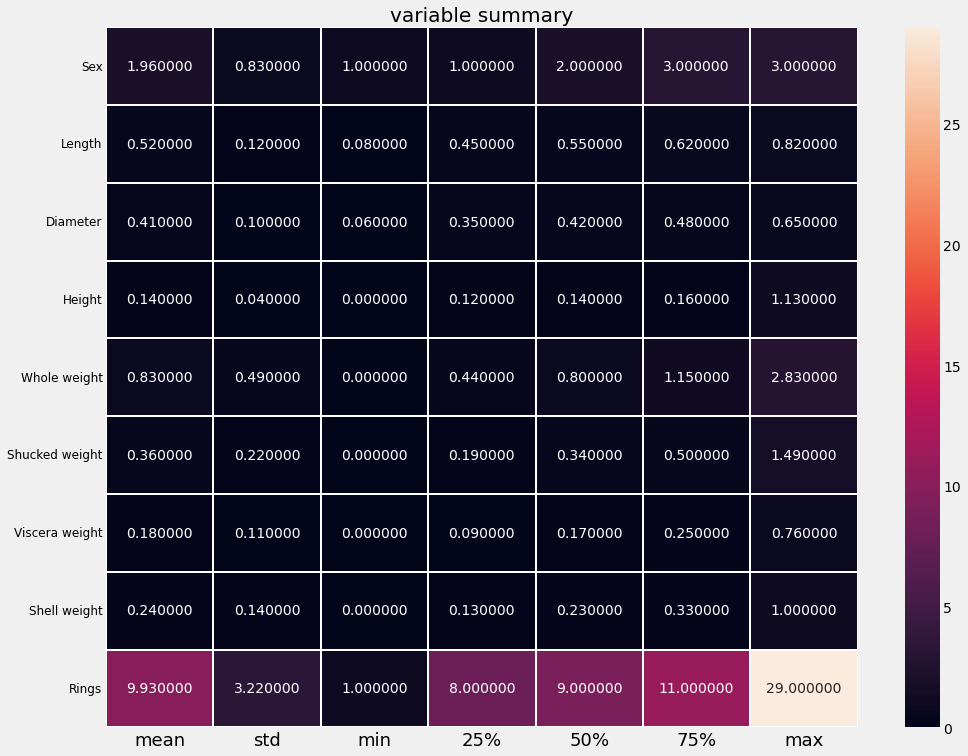

In [256]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("variable summary")
plt.show()

<AxesSubplot:>

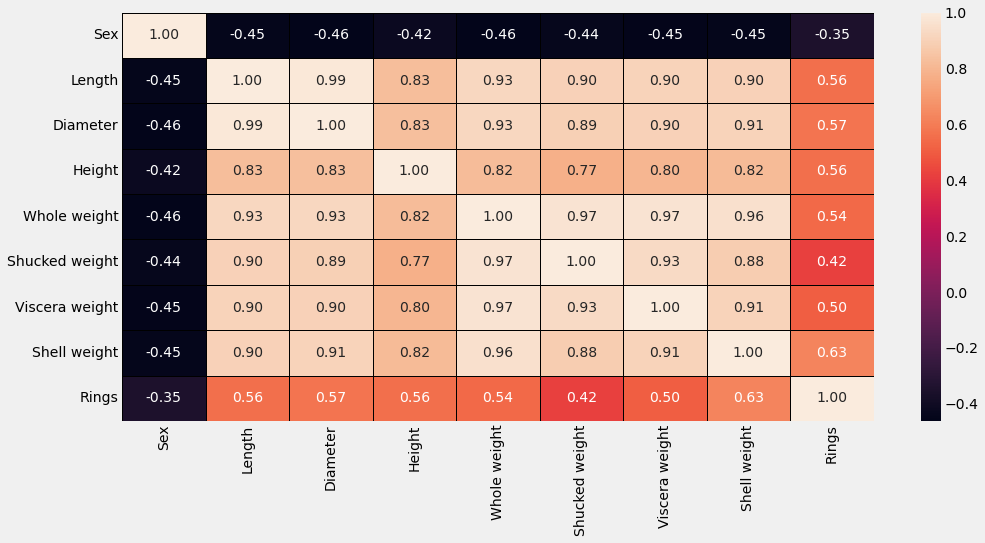

In [257]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt= '.2f')

From the Hit Maps its showing No abnormal features are there.

In [317]:
#Getting summary metrics for the dataframe
print(df.describe())

               Sex       Length     Diameter       Height  Whole weight  \
count  4177.000000  4177.000000  4177.000000  4177.000000   4177.000000   
mean      1.955470     0.523992     0.407881     0.139516      0.828742   
std       0.827815     0.120093     0.099240     0.041827      0.490389   
min       1.000000     0.075000     0.055000     0.000000      0.002000   
25%       1.000000     0.450000     0.350000     0.115000      0.441500   
50%       2.000000     0.545000     0.425000     0.140000      0.799500   
75%       3.000000     0.615000     0.480000     0.165000      1.153000   
max       3.000000     0.815000     0.650000     1.130000      2.825500   

       Shucked weight  Viscera weight  Shell weight        Rings          Age  
count     4177.000000     4177.000000   4177.000000  4177.000000  4177.000000  
mean         0.359367        0.180594      0.238831     9.933684     2.009576  
std          0.221963        0.109614      0.139203     3.224169     0.826642  
min 

In [318]:
#Checking for missing/null values
df.select_dtypes(include=['object']).isnull().sum()
df.select_dtypes(include=[np.number]).isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
Age               0
dtype: int64

# Adding age column in the dataframe for classification. Age is classified based on the number of rings.

Rings 1-8 -->Age 1, denoting young

Rings 9-10 -->Age 2, denoting middle

Rings 11-29 -->Age 3, denoting old

In [319]:
def label_race (row):
   if row['Rings']>=1 and row['Rings']<=8:
      return 1
   elif row['Rings'] >=9 and row['Rings']<=10:
      return 2
   elif row['Rings']>=11 and row['Rings']<=29:
      return 3
   return 0

df['Age'] = df.apply(lambda _: '', axis=1)

df['Age']=df.apply (lambda row: label_race (row),axis=1)

df.Sex = df.Sex.astype(float)
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,3
1,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,1
2,2.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,2
3,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2
4,3.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1
...,...,...,...,...,...,...,...,...,...,...
4172,2.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,3
4173,1.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2
4174,1.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,2
4175,2.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,2


In [320]:
df[df['Height'] == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
1257,3.0,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8,1
3996,3.0,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6,1


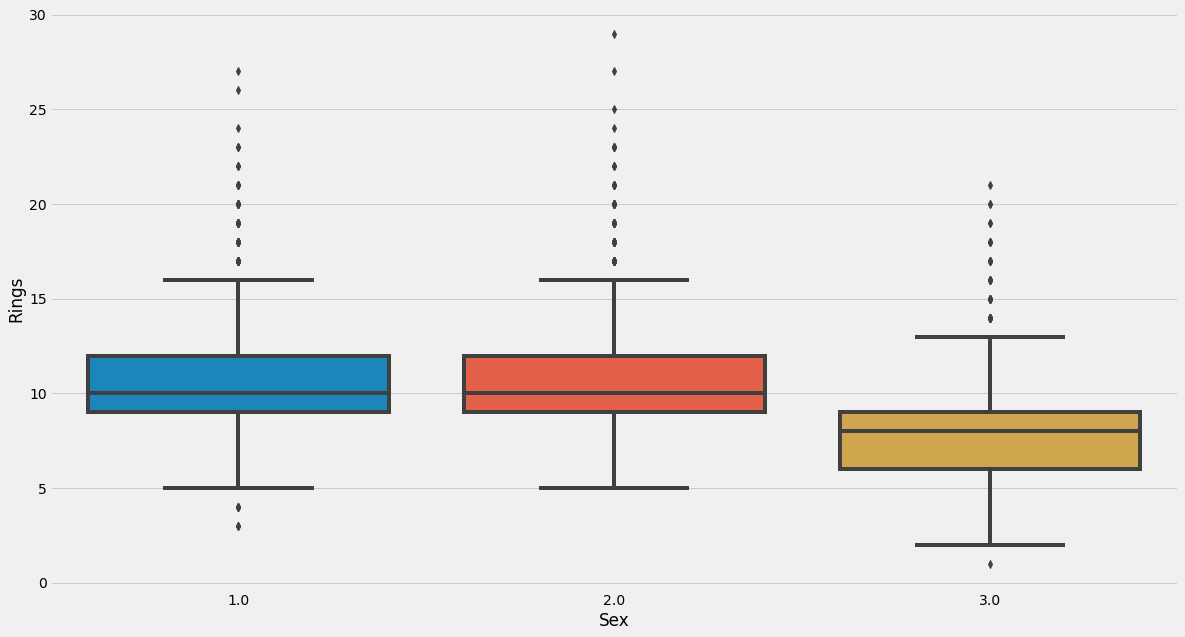

In [321]:
ax = sns.boxplot(x="Sex", y="Rings", data=df)


Infants have lower number of rings as compared to males and females

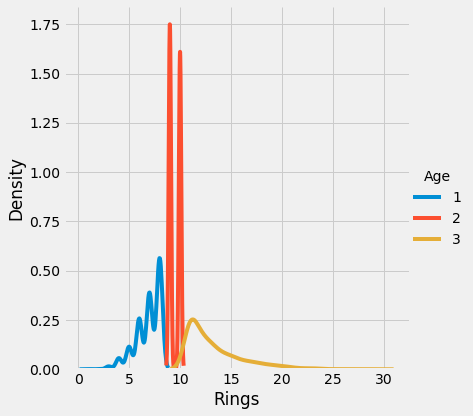

In [322]:
sns.FacetGrid(df, hue="Age", size=6) \
   .map(sns.kdeplot, "Rings") \
   .add_legend()

Age labelled 1 are youth, label 2 are middle aged and 3 are old aged. Young abalones have 0-10 rings, Middle aged abalones have 9-11 rings and old abalones have more than 10 rings

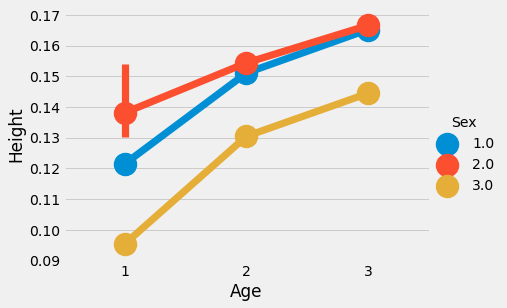

In [337]:
sns.factorplot('Age', 'Height', hue = 'Sex', estimator = np.mean, data = df, 
             size = 4.5, aspect = 1.4)


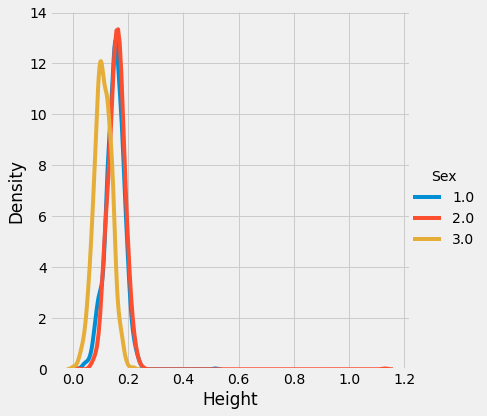

In [323]:
sns.FacetGrid(df, hue="Sex", size=6) \
   .map(sns.kdeplot, "Height") \
   .add_legend()

##### Female abalones have more height than males and infants. Height of infants is between 0 to 0.3mm

Classification

Response variable is age

<Figure size 1296x720 with 0 Axes>

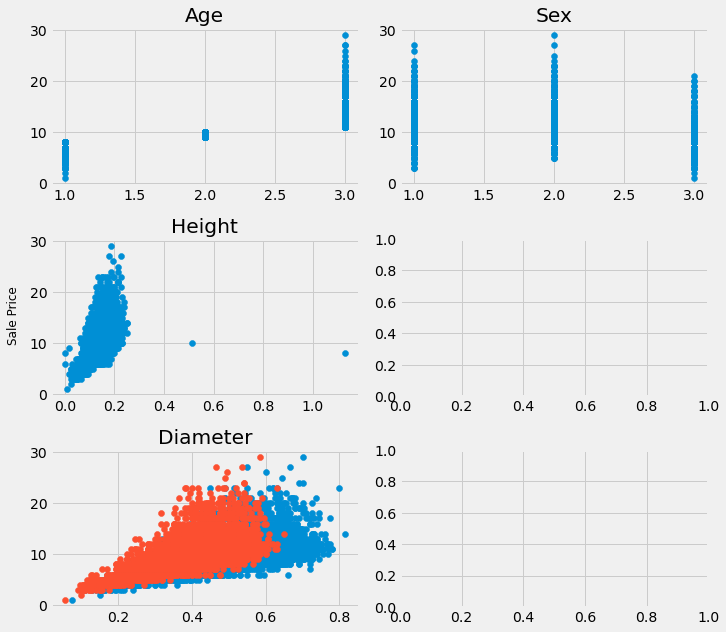

In [335]:
plt.figure(1)
f, axarr = plt.subplots(3, 2, figsize=(10, 9))
ring = df.Rings.values
axarr[0, 0].scatter(df.Age.values, ring)
axarr[0, 0].set_title('Age')
axarr[0, 1].scatter(df.Sex.values, ring)
axarr[0, 1].set_title('Sex')
axarr[1, 0].scatter(df.Height.values, ring)
axarr[1, 0].set_title('Height')
axarr[2, 0].scatter(df.Length.values, ring)
axarr[2, 0].set_title('Length')
axarr[2, 0].scatter(df.Diameter.values, ring)
axarr[2, 0].set_title('Diameter')
f.text(-0.01, 0.5, 'Sale Price', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()

# Now from below we will check the ditribution of datas.

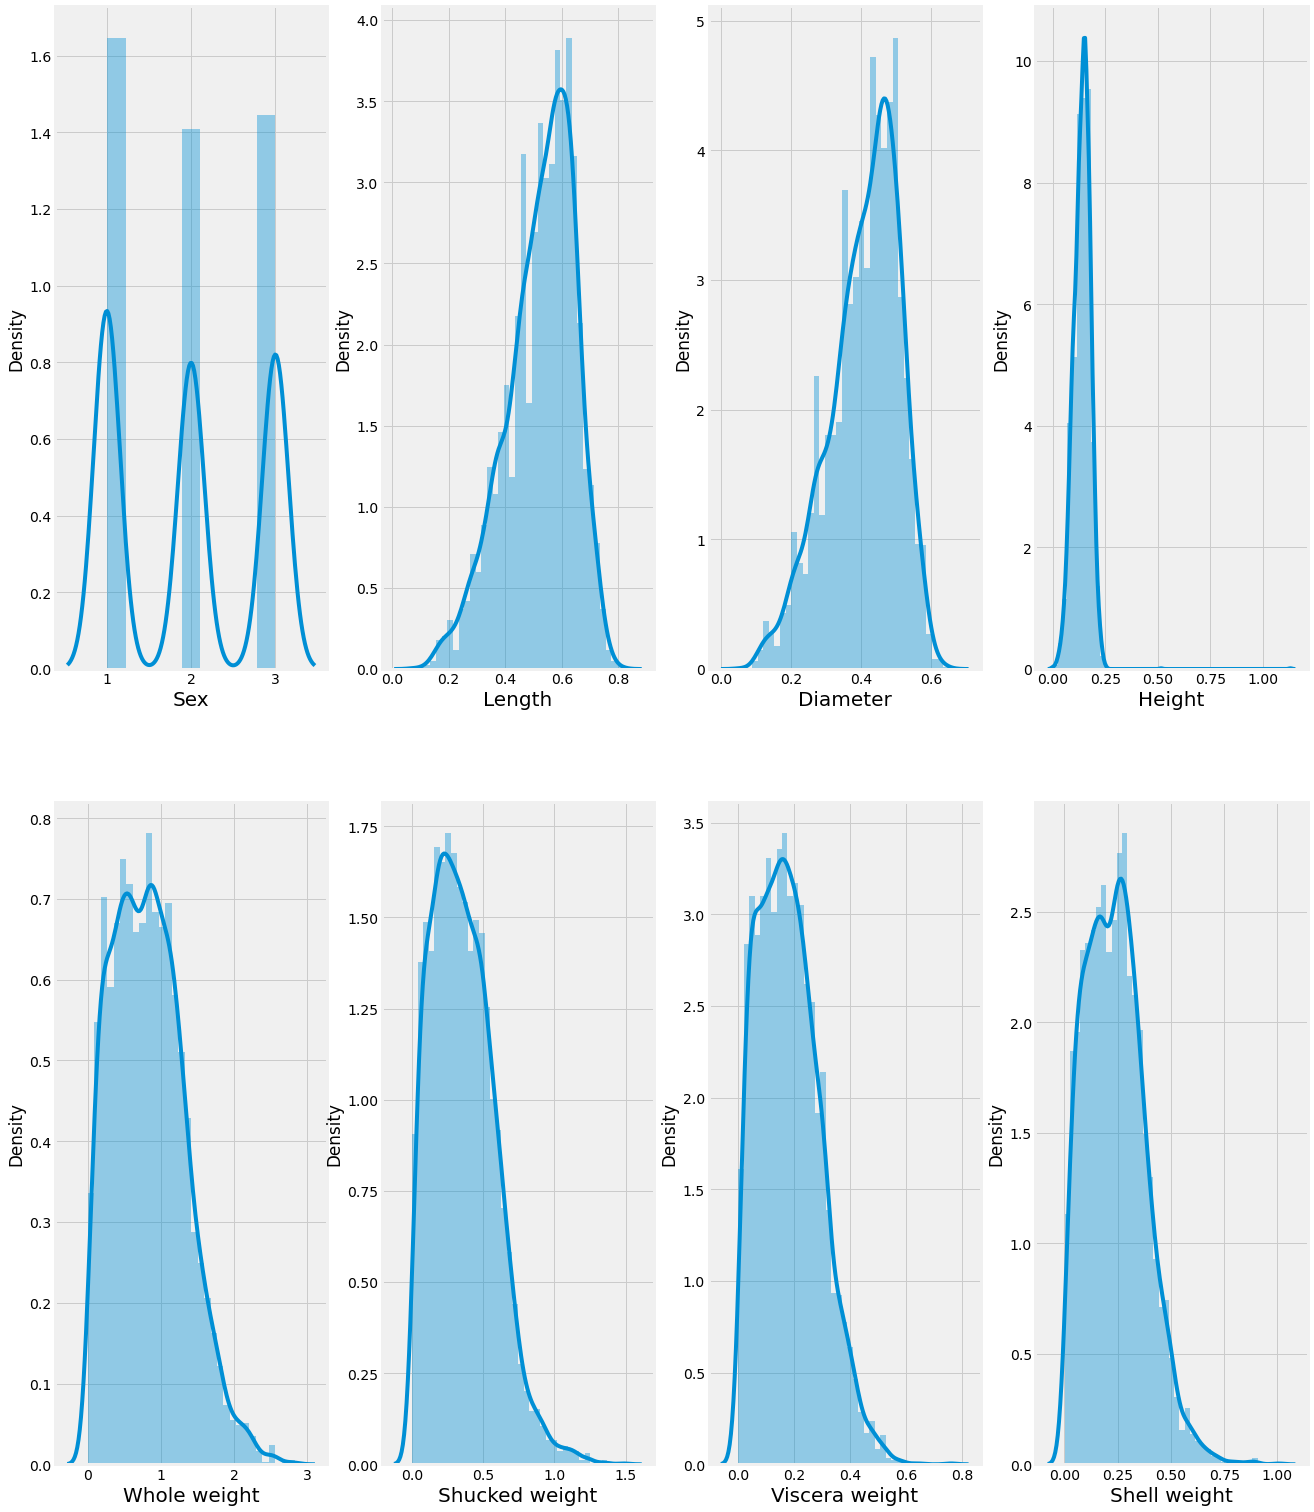

In [324]:
#let's see how data is dustributed for every column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=8:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()  

# Checking the Outliers

<AxesSubplot:>

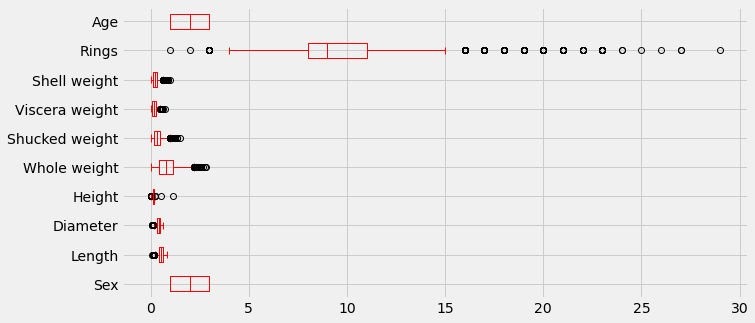

In [334]:
df.plot(kind='box',color='r',vert = False,figsize =(10,5))    #Box Plot

# Correcting the Outliers

In [325]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(4177, 10)

In [326]:
threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [327]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(4177, 10)
(4027, 10)


## Percentage of Data Loss after Outliers Removal

In [328]:
loss_percent=(4177-4027)/4177*100
print(loss_percent)

3.5910940866650707


In [336]:
df_new.skew(axis = 0, skipna = True)

Sex               0.062158
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
Age               0.026621
dtype: float64

##### The rule of thumb seems to be:
If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.

If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed.

If the skewness is less than -1 or greater than 1, the data are highly skewed.

Dividing Data in features and vectors

In [289]:
Y = df[['Age']]
Y 

,Age
0,3
1,1
2,2
3,2
4,1
...,...
4172,3
4173,2
4174,2
4175,2


In [290]:
X=df.drop(['Age','Rings'], axis=1)
X

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,2.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,3.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,2.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,1.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,1.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,2.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


# Skewness Removal

In [338]:
from sklearn.preprocessing import power_transform
X=power_transform(X,method='yeo-johnson')

In [339]:
X

array([[-1.19309782, -0.68550213, -0.54986033, ..., -0.54098937,
        -0.69328289, -0.587809  ],
       [-1.19309782, -1.39634403, -1.38733299, ..., -1.31166208,
        -1.33295268, -1.33241968],
       [ 0.15000805, -0.07077438,  0.00853714, ..., -0.36611642,
        -0.25513514, -0.09826193],
       ...,
       [-1.19309782,  0.59336612,  0.64519089, ...,  0.83813658,
         1.01560749,  0.59839786],
       [ 0.15000805,  0.85337516,  0.76992788, ...,  0.85873857,
         0.81518436,  0.51914542],
       [-1.19309782,  1.83447784,  1.72628889, ...,  2.10364827,
         1.61134422,  1.65848824]])

## 1. Logistic Regression

In [391]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [392]:
y_pred = log_reg.predict(x_test)

In [393]:
#Confusion Matrix
conf_mat= confusion_matrix(y_test,y_pred)
conf_mat

array([[270,  65,  21],
       [ 74, 160, 106],
       [ 28,  80, 241]])

In [394]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[270,  65,  21],
       [ 74, 160, 106],
       [ 28,  80, 241]])

In [395]:
from sklearn.metrics import classification_report
print (classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           1       0.73      0.76      0.74       356
           2       0.52      0.47      0.50       340
           3       0.65      0.69      0.67       349

    accuracy                           0.64      1045
   macro avg       0.64      0.64      0.64      1045
weighted avg       0.64      0.64      0.64      1045



### Searching Hyperparameters for Logistic Regration

In [398]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


/Users/rakeshchandramaity/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rakeshchandramaity/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

Best: 0.954333 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.948667 (0.020774) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.950667 (0.019821) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.949333 (0.019989) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.948667 (0.019956) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.950333 (0.020246) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.949333 (0.019989) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.948667 (0.019788) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.948000 (0.021354) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.949667 (0.020246) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.949667 (0.021211) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.949333 (0.020966) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.951000 (0.020551) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.953000 (0.021779) wi

/Users/rakeshchandramaity/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rakeshchandramaity/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

## Neural Network 

In [359]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
#neural network
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

neural_network_class=MLPClassifier(hidden_layer_sizes=(20,10,20))
neural_network_class.fit(x_train,y_train)
predictions = neural_network_class.predict(x_test)
y_pred=predictions

#calculate ROC curve
#preds = neural_network_class.predict_proba(test_X)[:,1]
#calculate_roc_curve(test_y, y_pred,3)


#calculate Confusion Matrix
print("Confusion Matrix")
conf_mat= confusion_matrix(y_test,y_pred)
conf_mat

print("Accuracy of Neural Networks is")
print(accuracy_score(y_test, y_pred)*100)

#Mean Absolute Error 

mae = mean_absolute_error (y_test,y_pred)
print("MAE:"+str(mae))
#RMSE 
rmse = np.sqrt(mean_absolute_error (y_test,y_pred))
print("RMSE:"+str(rmse))
#Median Absolute error
Medae=mean_squared_error (y_test,y_pred)
print("Median Absolute Error:"+str(Medae)) 

from sklearn.metrics import classification_report
print (classification_report(y_test,y_pred,digits=2))


Confusion Matrix
Accuracy of Neural Networks is
64.97607655502392
MAE:0.3894736842105263
RMSE:0.624078267696069
Median Absolute Error:0.46794258373205744
              precision    recall  f1-score   support

           1       0.77      0.71      0.74       356
           2       0.52      0.53      0.52       340
           3       0.66      0.71      0.69       349

    accuracy                           0.65      1045
   macro avg       0.65      0.65      0.65      1045
weighted avg       0.65      0.65      0.65      1045



# 3. Random Forest


In [360]:
#Random Forest
rf = RandomForestClassifier(n_jobs=2)
rf.fit(x_train, y_train)
preds = rf.predict_proba(x_test)[:,1]
y_pred=rf.predict(x_test)
#calculate ROC curve
#calculate_roc_curve(y_test, y_pred,2) 


#calculate Confusion Matrix
print("Confusion Matrix")
conf_mat= confusion_matrix(y_test,y_pred)
conf_mat

print("Accuracy of Random Forest is:")
print(accuracy_score(y_test, y_pred)*100)

#Mean Absolute Error 

mae=mean_absolute_error(y_test,y_pred);
print("MAE:"+str(mae))
#RMSE 
rmse = np.sqrt(mean_absolute_error (y_test,y_pred))
print("RMSE:"+str(rmse))
#Median Absolute error
Medae=mean_squared_error (y_test,y_pred)
print("Median Absolute Error:"+str(Medae)) 

from sklearn.metrics import classification_report
print (classification_report(y_test,y_pred,digits=2))

Confusion Matrix
Accuracy of Random Forest is:
63.0622009569378
MAE:0.4143540669856459
RMSE:0.6437033998555902
Median Absolute Error:0.5043062200956938
              precision    recall  f1-score   support

           1       0.74      0.72      0.73       356
           2       0.50      0.47      0.49       340
           3       0.64      0.69      0.67       349

    accuracy                           0.63      1045
   macro avg       0.63      0.63      0.63      1045
weighted avg       0.63      0.63      0.63      1045



# 4. KNN Algorithm

In [314]:
from time import time
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif

start = time()
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

print("Knn training  Time : ",(time()-start))

start = time()
y_pred = knn.predict(x_test)
print("Knn test  Time : ",(time()-start))

Knn training  Time :  0.005383729934692383
Knn test  Time :  0.0546879768371582


In [315]:
cfm_knn = confusion_matrix(y_test,y_pred)
cfm_knn

array([[265,  69,  22],
       [ 84, 167,  89],
       [ 35, 101, 213]])

In [316]:
print (classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           1       0.69      0.74      0.72       356
           2       0.50      0.49      0.49       340
           3       0.66      0.61      0.63       349

    accuracy                           0.62      1045
   macro avg       0.61      0.62      0.61      1045
weighted avg       0.62      0.62      0.62      1045



# Cross Validation Score

In [416]:
pred_log_reg=log_reg.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test,pred_log_reg)
for j in range(2,10):
    lsscore=cross_val_score(log_reg,x_test,y_test,cv=j)
    lsc=lsscore.mean()
    print("At cv:-",j)
    print("Cross Validation Score is:-",lsc*100)
    print("accuracy_score is:-",lss*100)
    print("\n")
    

At cv:- 2
Cross Validation Score is:- 65.64489425140839
accuracy_score is:- 64.21052631578948


At cv:- 3
Cross Validation Score is:- 65.35640966527242
accuracy_score is:- 64.21052631578948


At cv:- 4
Cross Validation Score is:- 64.11299757246059
accuracy_score is:- 64.21052631578948


At cv:- 5
Cross Validation Score is:- 64.7846889952153
accuracy_score is:- 64.21052631578948


At cv:- 6
Cross Validation Score is:- 64.59003831417624
accuracy_score is:- 64.21052631578948


At cv:- 7
Cross Validation Score is:- 65.73410035155001
accuracy_score is:- 64.21052631578948


At cv:- 8
Cross Validation Score is:- 64.97064004697593
accuracy_score is:- 64.21052631578948


At cv:- 9
Cross Validation Score is:- 65.35678029930904
accuracy_score is:- 64.21052631578948




# Model Saving

In [420]:
import pickle
filename= 'Abalone case.pkl'
pickle.dump(log_reg,open (filename,'wb'))